# 필요한 라이브러리 및 데이터셋 업로드

In [29]:
import numpy as np
import pandas as pd
import pickle

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
winner_df =  pd.read_pickle('rawData/match_winner_data_version1.pickle')
loser_df = pd.read_pickle('rawData/match_loser_data_version1.pickle')

In [31]:
# 승자와 패자 데이터 합치기
data = pd.concat([winner_df, loser_df], ignore_index=True)
data.info()

# win 데이터만 217646개로, 12개의 null값이 있는 걸 확인할 수 있다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217658 entries, 0 to 217657
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   teamId                217658 non-null  int64  
 1   win                   217646 non-null  object 
 2   firstBlood            217658 non-null  bool   
 3   firstTower            217658 non-null  bool   
 4   firstInhibitor        217658 non-null  bool   
 5   firstBaron            217658 non-null  bool   
 6   firstDragon           217658 non-null  bool   
 7   firstRiftHerald       217658 non-null  bool   
 8   towerKills            217658 non-null  int64  
 9   inhibitorKills        217658 non-null  int64  
 10  baronKills            217658 non-null  int64  
 11  dragonKills           217658 non-null  int64  
 12  vilemawKills          217658 non-null  int64  
 13  riftHeraldKills       217658 non-null  int64  
 14  dominionVictoryScore  217658 non-null  int64  
 15  

In [32]:
# Fail을 Lose로 바꾸기
data = data.replace({'win': {'Fail': 'Lose'}})

In [33]:
data.tail()

,teamId,win,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,towerKills,inhibitorKills,baronKills,dragonKills,vilemawKills,riftHeraldKills,dominionVictoryScore,bans,gameId
217653,200,Lose,True,False,False,False,False,False,3,0,0,1,0,0,0,[],4.088497e+09
217654,200,Lose,False,True,False,False,True,True,3,0,0,2,0,2,0,"[{'championId': 84, 'pickTurn': 6}, {'champion...",4.130964e+09
217655,200,Lose,True,True,True,False,True,True,6,1,0,3,0,1,0,"[{'championId': 107, 'pickTurn': 6}, {'champio...",4.119954e+09
217656,200,Lose,False,False,False,True,True,False,5,0,1,3,0,0,0,[],4.130440e+09
217657,200,Lose,True,False,True,False,False,False,4,2,0,0,0,0,0,[],4.225861e+09


# 데이터셋 전처리

## null 값 확인 및 제거

In [34]:
# 217658개중 null값이 있는 데이터는 12개로 적으니 제거하는 방법을 선택합니다.
data = data.dropna(axis=0)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 217646 entries, 0 to 217657
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   teamId                217646 non-null  int64  
 1   win                   217646 non-null  object 
 2   firstBlood            217646 non-null  bool   
 3   firstTower            217646 non-null  bool   
 4   firstInhibitor        217646 non-null  bool   
 5   firstBaron            217646 non-null  bool   
 6   firstDragon           217646 non-null  bool   
 7   firstRiftHerald       217646 non-null  bool   
 8   towerKills            217646 non-null  int64  
 9   inhibitorKills        217646 non-null  int64  
 10  baronKills            217646 non-null  int64  
 11  dragonKills           217646 non-null  int64  
 12  vilemawKills          217646 non-null  int64  
 13  riftHeraldKills       217646 non-null  int64  
 14  dominionVictoryScore  217646 non-null  int64  
 15  

# 데이터셋 분석

## 데이터 기초통계량

In [35]:
# 전체 팀의 기초통계량
data[['towerKills', 'inhibitorKills', 'baronKills', 'dragonKills', 'riftHeraldKills']].describe()

,towerKills,inhibitorKills,baronKills,dragonKills,riftHeraldKills
count,217646.000000,217646.00000,217646.000000,217646.000000,217646.000000
mean,4.257243,0.65800,0.300162,1.384882,0.597415
std,3.369743,0.91608,0.540223,1.288432,0.710547
min,0.000000,0.00000,0.000000,0.000000,0.000000
25%,1.000000,0.00000,0.000000,0.000000,0.000000
50%,4.000000,0.00000,0.000000,1.000000,0.000000
75%,7.000000,1.00000,1.000000,2.000000,1.000000
max,11.000000,10.00000,5.000000,7.000000,2.000000


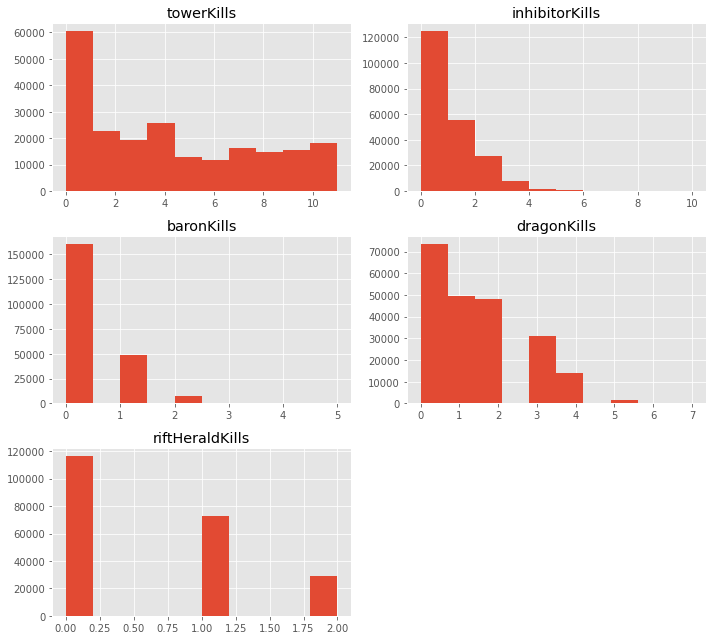

In [36]:
data[['towerKills', 'inhibitorKills', 'baronKills', 'dragonKills', 'riftHeraldKills']].hist(figsize=(10,9))
plt.tight_layout()
plt.show()

# tail(0)에 치우쳐진 그래프 양상을 보임

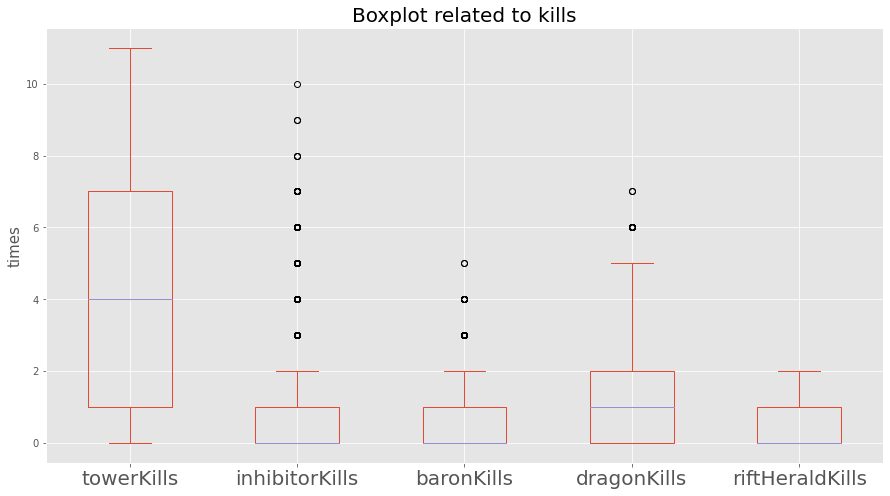

In [37]:
data[['towerKills', 'inhibitorKills', 'baronKills', 'dragonKills', 'riftHeraldKills']].plot(kind='box', figsize=(15,8))

plt.title('Boxplot related to kills', size=20)
plt.xticks(rotation=0, size=20)
plt.ylabel('times', size=15)
plt.show()

In [38]:
data[(data['inhibitorKills'] > 5)][['towerKills', 'inhibitorKills', 'baronKills', 'dragonKills', 'riftHeraldKills']].describe()

,towerKills,inhibitorKills,baronKills,dragonKills,riftHeraldKills
count,126.000000,126.000000,126.000000,126.000000,126.000000
mean,10.769841,6.333333,1.682540,3.500000,0.873016
std,0.567982,0.681175,1.114636,1.224745,0.789776
min,8.000000,6.000000,0.000000,0.000000,0.000000
25%,11.000000,6.000000,1.000000,3.000000,0.000000
50%,11.000000,6.000000,2.000000,4.000000,1.000000
75%,11.000000,6.750000,2.000000,4.000000,1.750000
max,11.000000,10.000000,5.000000,6.000000,2.000000


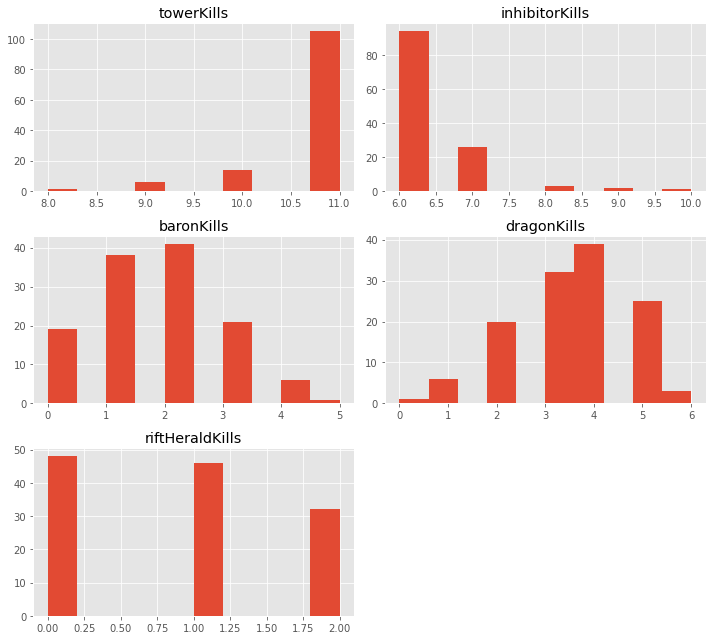

In [39]:
data[(data['inhibitorKills'] > 5)][['towerKills', 'inhibitorKills', 'baronKills', 'dragonKills', 'riftHeraldKills']].hist(figsize=(10,9))
plt.tight_layout()
plt.show()

In [42]:
# 이상치 제거 (억제기 6번 이상 파괴)
data.drop(data.loc[data['inhibitorKills'] > 5].index, inplace=True)
winner_df.drop(winner_df.loc[winner_df['inhibitorKills'] > 5].index, inplace=True)
loser_df.drop(loser_df.loc[loser_df['inhibitorKills'] > 5].index, inplace=True)

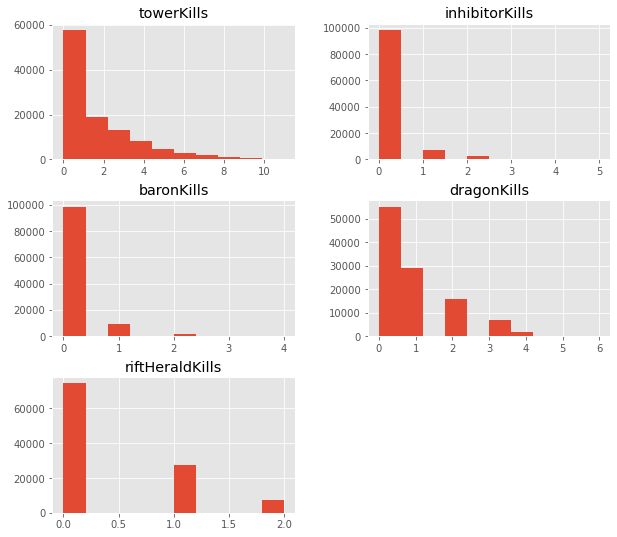

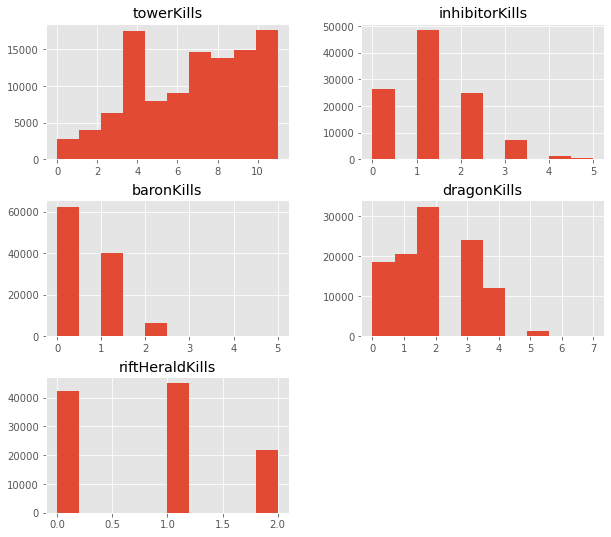

In [41]:
data[['win','towerKills', 'inhibitorKills', 'baronKills', 'dragonKills', 'riftHeraldKills']].groupby('win').hist(figsize=(10,9))
plt.show()

# 아래가 진 팀 / 위가 이긴 팀
# 이긴 팀이 확

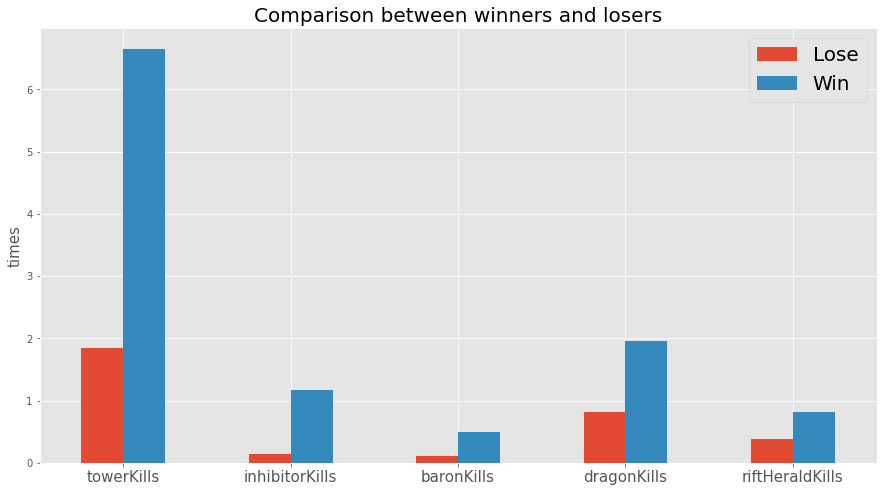

In [14]:
plt.style.use('ggplot')

winFail_df = data[['win','towerKills', 'inhibitorKills', 'baronKills', 'dragonKills', 'riftHeraldKills']].groupby('win').mean()
winFail_df = winFail_df.transpose()
winFail_df.plot(kind='bar', figsize=(15, 8), width=0.5)
    
plt.title('Comparison between winners and losers', size=20)
plt.xticks(rotation=0, size=15)
plt.ylabel('times', size=15)
plt.legend(loc='best', fontsize=20, labels=['Lose', 'Win'])
plt.show()

# 모든 수치에서 이긴 팀이 앞서며, 특히 towerKills에서 차이가 많이 나는 걸 알 수 있습니다.

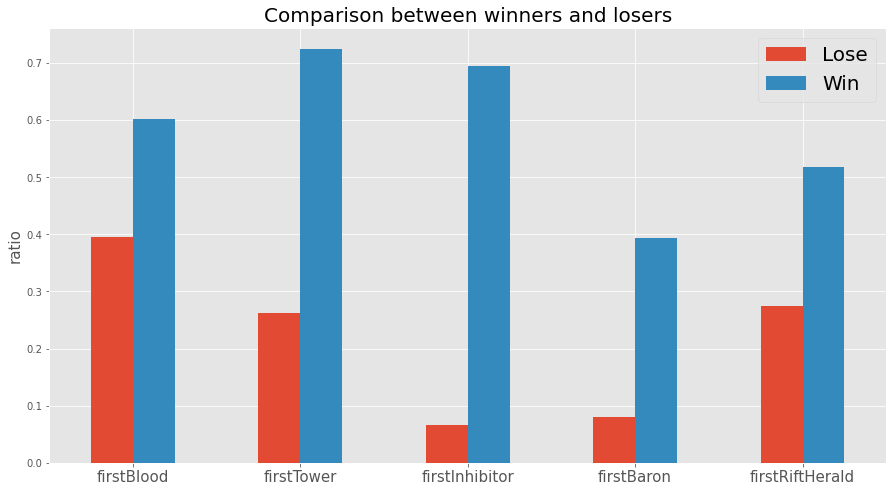

In [15]:
plt.style.use('ggplot')

winFail_df = data[['win','firstBlood', 'firstTower', 'firstInhibitor', 'firstBaron', 'firstRiftHerald']].groupby('win').mean()
winFail_df = winFail_df.transpose()
winFail_df.plot(kind='bar', figsize=(15, 8), width=0.5)
    
plt.title('Comparison between winners and losers', size=20)
plt.xticks(rotation=0, size=15)
plt.ylabel('ratio', size=15)
plt.legend(loc='best', fontsize=20, labels=['Lose', 'Win'])
plt.show()

# 모든 수치에서 이긴 팀이 앞서며, 특히 firstInhibitor에서 차이가 많이 나는 걸 알 수 있습니다.

In [16]:
# 승리팀과 패자팀의 기초통계량 비교
data[['win','towerKills', 'inhibitorKills', 'baronKills', 'dragonKills', 'riftHeraldKills']].groupby('win').mean()

,towerKills,inhibitorKills,baronKills,dragonKills,riftHeraldKills
win,,,,,
Lose,1.852753,0.135031,0.108918,0.816796,0.383283
Win,6.655823,1.174747,0.489933,1.950903,0.811374


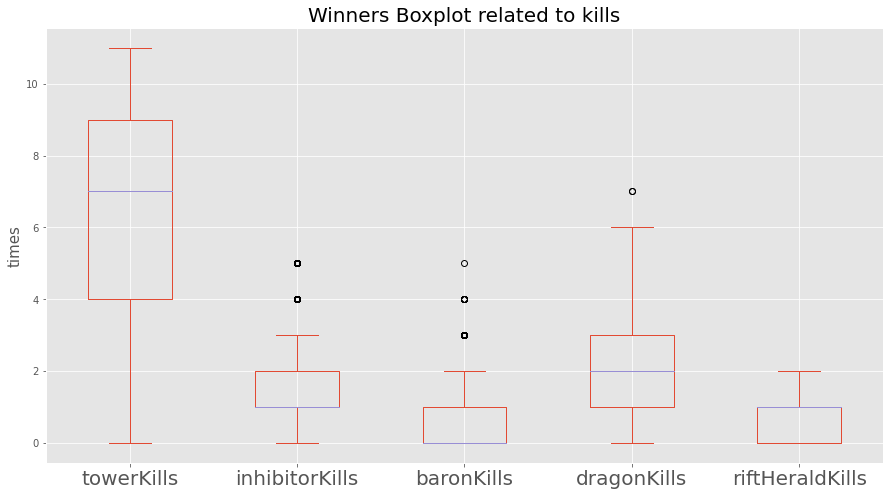

In [43]:
winner_df[['towerKills', 'inhibitorKills', 'baronKills', 'dragonKills', 'riftHeraldKills']].plot(kind='box', figsize=(15,8))

plt.title('Winners Boxplot related to kills', size=20)
plt.xticks(rotation=0, size=20)
plt.ylabel('times', size=15)
plt.show()

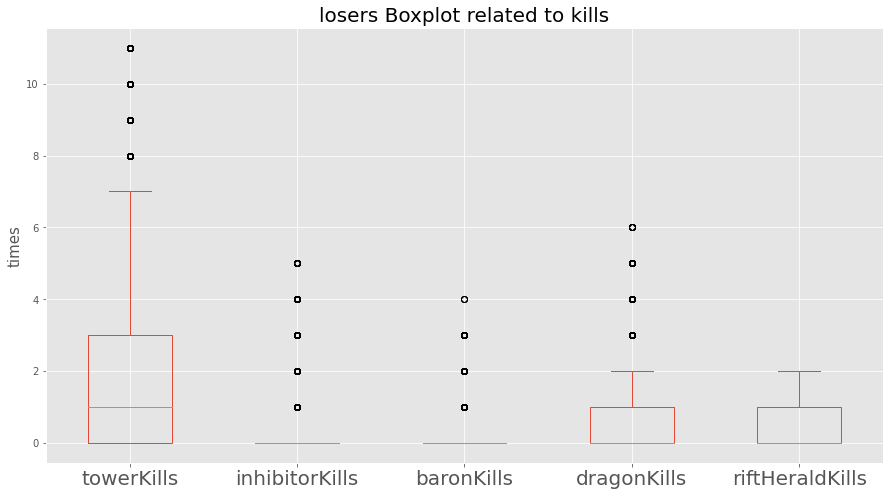

In [44]:
loser_df[['towerKills', 'inhibitorKills', 'baronKills', 'dragonKills', 'riftHeraldKills']].plot(kind='box', figsize=(15,8))

plt.title('losers Boxplot related to kills', size=20)
plt.xticks(rotation=0, size=20)
plt.ylabel('times', size=15)
plt.show()

## Feature간 상관관계 분석

In [19]:
data[['win','firstBlood', 'firstTower', 'firstInhibitor', 'firstBaron', 'firstRiftHerald','towerKills', 'inhibitorKills', 'baronKills', 'dragonKills', 'riftHeraldKills']].corr()
# tower와 inhibitor, first와 kills의 높은 상관관계가 나타났으므로 이후 feature engineering으로 feature 수[dimension]를 줄이는 것을 기대해볼 수 있습니다.

,firstBlood,firstTower,firstInhibitor,firstBaron,firstRiftHerald,towerKills,inhibitorKills,baronKills,dragonKills,riftHeraldKills
firstBlood,1.000000,0.218720,0.157213,0.052994,0.137966,0.188850,0.126444,0.046144,0.129317,0.143406
firstTower,0.218720,1.000000,0.387693,0.131455,0.434615,0.473655,0.319171,0.109086,0.265934,0.430868
firstInhibitor,0.157213,0.387693,1.000000,0.397995,0.198679,0.762824,0.785270,0.372344,0.372131,0.271526
firstBaron,0.052994,0.131455,0.397995,1.000000,0.154735,0.538541,0.394527,0.884751,0.466354,0.230509
firstRiftHerald,0.137966,0.434615,0.198679,0.154735,1.000000,0.351587,0.134898,0.141707,0.276498,0.839855
towerKills,0.188850,0.473655,0.762824,0.538541,0.351587,1.000000,0.763233,0.550011,0.623778,0.442599
inhibitorKills,0.126444,0.319171,0.785270,0.394527,0.134898,0.763233,1.000000,0.430519,0.364783,0.202126
baronKills,0.046144,0.109086,0.372344,0.884751,0.141707,0.550011,0.430519,1.000000,0.499236,0.210373
dragonKills,0.129317,0.265934,0.372131,0.466354,0.276498,0.623778,0.364783,0.499236,1.000000,0.373236
riftHeraldKills,0.143406,0.430868,0.271526,0.230509,0.839855,0.442599,0.202126,0.210373,0.373236,1.000000


<AxesSubplot:>

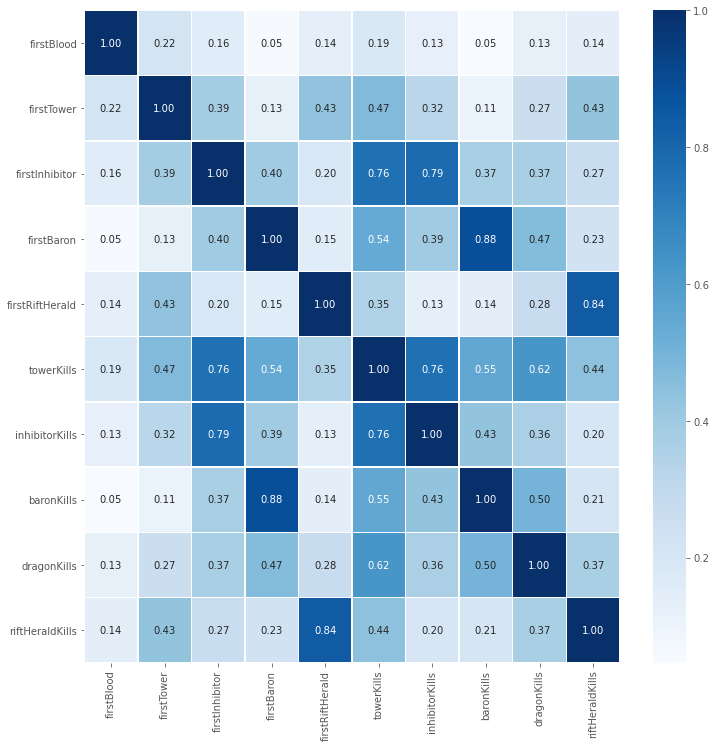

In [45]:
plt.figure(figsize=(12,12))
sns.heatmap(data = data[['win','firstBlood', 'firstTower', 'firstInhibitor', 'firstBaron', 'firstRiftHerald','towerKills', 'inhibitorKills', 'baronKills', 'dragonKills', 'riftHeraldKills']].corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

In [21]:
# 문자열 데이터인 Win, Fail을 Boolean값으로 변환
dict_win = {"Win": 1, "Fail": 0}
data['win'] = data['win'].map(dict_win).tolist()
data.head()

,teamId,win,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,towerKills,inhibitorKills,baronKills,dragonKills,vilemawKills,riftHeraldKills,dominionVictoryScore,bans,gameId
0,200,1.0,False,True,True,False,True,True,9,1,0,3,0,2,0,"[{'championId': 523, 'pickTurn': 6}, {'champio...",4.247263e+09
1,100,1.0,False,False,False,False,True,True,4,0,0,2,0,2,0,"[{'championId': 523, 'pickTurn': 1}, {'champio...",4.247156e+09
2,200,1.0,True,True,True,False,True,True,5,1,0,2,0,2,0,"[{'championId': 350, 'pickTurn': 6}, {'champio...",4.243963e+09
3,200,1.0,True,True,False,False,False,True,6,0,1,3,0,1,0,"[{'championId': 81, 'pickTurn': 6}, {'champion...",4.241678e+09
4,100,1.0,True,True,True,True,True,True,11,3,2,2,0,2,0,"[{'championId': 30, 'pickTurn': 1}, {'champion...",4.241539e+09


In [22]:
winCorr = data[['win','firstBlood', 'firstTower', 'firstInhibitor', 'firstBaron', 'firstRiftHerald','towerKills', 'inhibitorKills', 'baronKills', 'dragonKills', 'riftHeraldKills']].corrwith(data['win'])
pd.DataFrame(winCorr)

,0
win,NaN
firstBlood,NaN
firstTower,NaN
firstInhibitor,NaN
firstBaron,NaN
firstRiftHerald,NaN
towerKills,NaN
inhibitorKills,NaN
baronKills,NaN
dragonKills,NaN


C:\Users\CIEL310\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


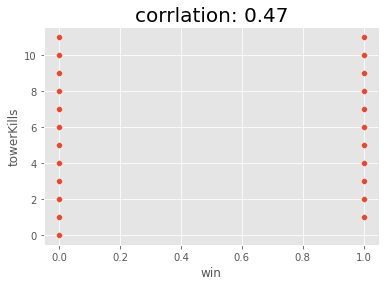

In [23]:
# Tower와 승리와의 상관관계 분석
corr = data['firstTower'].corr(data['towerKills'])
sns.scatterplot(data['firstTower'], data['towerKills'])
plt.title('corrlation: ' + str(np.round(corr, 2)), fontsize=20)
plt.xlabel("win", fontsize=12)
plt.ylabel("towerKills", fontsize=12)
plt.show()

In [24]:
data

,teamId,win,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,towerKills,inhibitorKills,baronKills,dragonKills,vilemawKills,riftHeraldKills,dominionVictoryScore,bans,gameId
0,200,1.0,False,True,True,False,True,True,9,1,0,3,0,2,0,"[{'championId': 523, 'pickTurn': 6}, {'champio...",4.247263e+09
1,100,1.0,False,False,False,False,True,True,4,0,0,2,0,2,0,"[{'championId': 523, 'pickTurn': 1}, {'champio...",4.247156e+09
2,200,1.0,True,True,True,False,True,True,5,1,0,2,0,2,0,"[{'championId': 350, 'pickTurn': 6}, {'champio...",4.243963e+09
3,200,1.0,True,True,False,False,False,True,6,0,1,3,0,1,0,"[{'championId': 81, 'pickTurn': 6}, {'champion...",4.241678e+09
4,100,1.0,True,True,True,True,True,True,11,3,2,2,0,2,0,"[{'championId': 30, 'pickTurn': 1}, {'champion...",4.241539e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217653,200,NaN,True,False,False,False,False,False,3,0,0,1,0,0,0,[],4.088497e+09
217654,200,NaN,False,True,False,False,True,True,3,0,0,2,0,2,0,"[{'championId': 84, 'pickTurn': 6}, {'champion...",4.130964e+09
217655,200,NaN,True,True,True,False,True,True,6,1,0,3,0,1,0,"[{'championId': 107, 'pickTurn': 6}, {'champio...",4.119954e+09
217656,200,NaN,False,False,False,True,True,False,5,0,1,3,0,0,0,[],4.130440e+09
